# Importação das bibliotecas necessárias

In [ ]:
import datetime
import numpy as np
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
from prophet import Prophet
from dask.distributed import LocalCluster, Client
import tensorflow as tf
from keras.layers import LSTM, Dense
from keras.models import Sequential
from keras import layers
import plotly.express as px
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet
import datetime

In [ ]:
!pip install pystan==2.19.1.1 prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 112 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0


# Analisando e Tratando os dados

In [ ]:
data = pd.read_csv('/content/shampoo.csv')

In [ ]:
data.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


-----

Precisei tratar os dados para chegar no formato adequado

In [ ]:
data["Month"] = "200" + data["Month"]

In [ ]:
data["Month"] = data["Month"] + "-01"

In [ ]:
data["Month"] = pd.to_datetime(data["Month"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   36 non-null     datetime64[ns]
 1   Sales   36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


In [ ]:
data.to_csv("shampoo2.csv", index=False)

In [ ]:
data = pd.read_csv('/content/shampoo2.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [ ]:
data.head()

,Month,Sales
0,2001-01-01,266.0
1,2001-02-01,145.9
2,2001-03-01,183.1
3,2001-04-01,119.3
4,2001-05-01,180.3


In [ ]:
data.isnull().sum()

Month    0
Sales    0
dtype: int64

In [ ]:
data = data.rename(columns = {"Month": "ds", "Sales": "y"})

In [ ]:
data.head()

,ds,y
0,2001-01-01,266.0
1,2001-02-01,145.9
2,2001-03-01,183.1
3,2001-04-01,119.3
4,2001-05-01,180.3


In [ ]:
# ordenando em ordem cronológica
data = data.sort_values(by = 'ds')
data

,ds,y
0,2001-01-01,266.0
1,2001-02-01,145.9
2,2001-03-01,183.1
3,2001-04-01,119.3
4,2001-05-01,180.3
5,2001-06-01,168.5
6,2001-07-01,231.8
7,2001-08-01,224.5
8,2001-09-01,192.8
9,2001-10-01,122.9


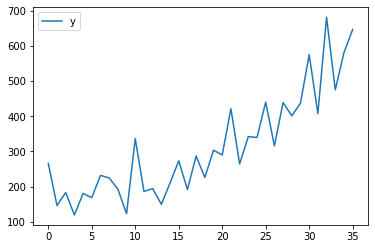

In [ ]:
# observando os dados
data.plot()

In [ ]:
# Criando uma variavel para plotar a dispersão dos dados
eixox = data['ds']
eixoy = data['y']

In [ ]:
fig= px.scatter(eixox,eixoy)
fig.show()

# Prophet: Forecasting at Scale

In [ ]:
# Criando modelo para treino
m = Prophet(seasonality_mode="multiplicative",
    weekly_seasonality=False, 
    daily_seasonality=False,
    yearly_seasonality=False)
m.fit(data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp94ubopo9/f3tg5l45.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp94ubopo9/n82lev5f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1405', 'data', 'file=/tmp/tmp94ubopo9/f3tg5l45.json', 'init=/tmp/tmp94ubopo9/n82lev5f.json', 'output', 'file=/tmp/tmp94ubopo9/prophet_modelofjnjlxd/prophet_model-20221124154033.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:40:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:40:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# treinando o modelo para previsão de 6 meses a frente
future = m.make_future_dataframe(periods=6)
forecast = m.predict(future)

In [83]:
# verificando se o intervalo de tempo está de acordo com o desejado (6 meses)
len(forecast) - len(data)

6

## Gráfico das previsões

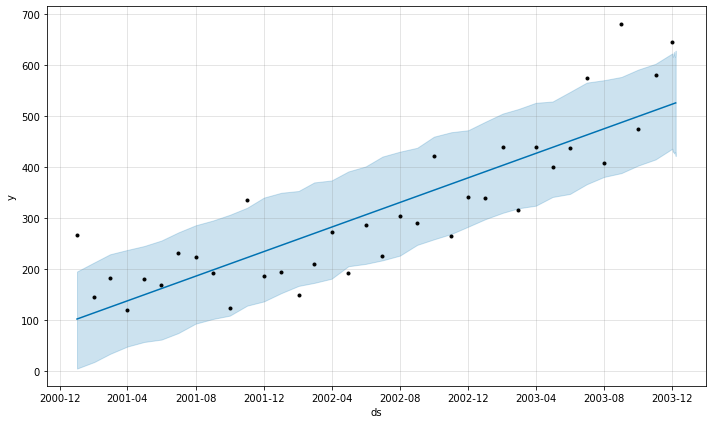

In [ ]:
m.plot(forecast);

Tendência de crescimento no faturamento

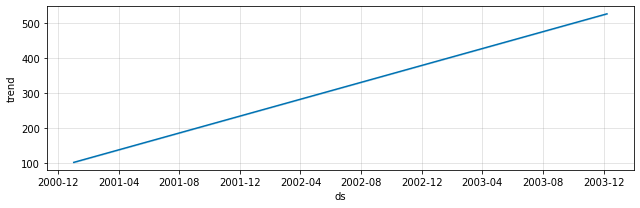

In [ ]:
m.plot_components(forecast);

In [ ]:
plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast, figsize=[800,400])

DEBUG:cmdstanpy:input tempfile: /tmp/tmp94ubopo9/9w3umkfd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp94ubopo9/8m_xnx3x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43195', 'data', 'file=/tmp/tmp94ubopo9/9w3umkfd.json', 'init=/tmp/tmp94ubopo9/8m_xnx3x.json', 'output', 'file=/tmp/tmp94ubopo9/prophet_modell3wc9cz4/prophet_model-20221124154640.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:46:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:46:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


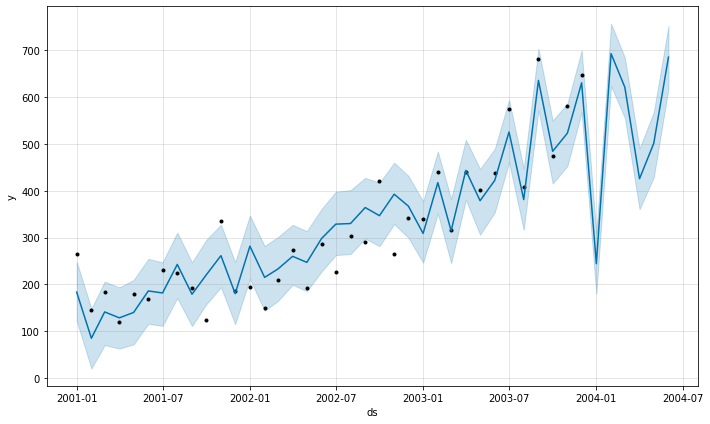

In [ ]:
model = Prophet(
    seasonality_mode="multiplicative",
    weekly_seasonality=False,
    daily_seasonality=False,
    yearly_seasonality=True,
)
model.fit(data)

future = model.make_future_dataframe(periods=6, freq = "MS")

forecast = model.predict(future)
fig1 = model.plot(forecast)

# RNN com Tensorflow

In [ ]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
n_steps = 6
X, y = split_sequence(list(data['y']), n_steps)

In [ ]:
# define modelo
n_features = 1
model = Sequential()
model.add(layers.SimpleRNN(50, activation='relu', input_shape=(n_steps,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
X.shape

(30, 6)

In [ ]:
# dividindo o dataset 
X = X.reshape((X.shape[0], X.shape[1], n_features))

X_train = X[1:15,:,:]
X_test = X[15:X.shape[0],:,:]

y_train = y[1:15]
y_test  = y[15:X.shape[0]]

In [ ]:
# verificando se a divisão dos dados está correta
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30, 6, 1)
(14, 6, 1)
(15, 6, 1)
(14,)
(15,)


In [ ]:
# treinando o modelo
model.fit(X_train, y_train, epochs=500, verbose=1)

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 40616.5234
Epoch 2/500
1/1 [==============================] - 0s 12ms/step - loss: 36735.5234
Epoch 3/500
1/1 [==============================] - 0s 20ms/step - loss: 32896.5430
Epoch 4/500
1/1 [==============================] - 0s 12ms/step - loss: 29157.0293
Epoch 5/500
1/1 [==============================] - 0s 14ms/step - loss: 25556.2031
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 22114.0977
Epoch 7/500
1/1 [==============================] - 0s 13ms/step - loss: 18853.9238
Epoch 8/500
1/1 [==============================] - 0s 10ms/step - loss: 15807.9238
Epoch 9/500
1/1 [==============================] - 0s 12ms/step - loss: 12991.8809
Epoch 10/500
1/1 [==============================] - 0s 10ms/step - loss: 10446.8701
Epoch 11/500
1/1 [==============================] - 0s 13ms/step - loss: 8217.0137
Epoch 12/500
1/1 [==============================] - 0s 11ms/step - loss: 6337.7534
Epoch

In [ ]:
# testando o modelo
y_pred=model.predict(X_test)

1/1 [==============================] - 0s 226ms/step


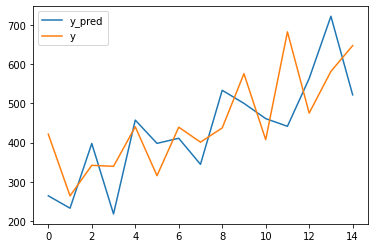

In [ ]:
plt.plot(y_pred, label ='y_pred')
plt.plot(y_test, label ='y')
plt.legend()

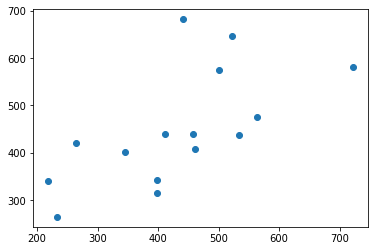

In [ ]:
plt.scatter(y_pred, y_test)

In [ ]:
data.tail()

,ds,y
31,2003-08-01,407.6
32,2003-09-01,682.0
33,2003-10-01,475.3
34,2003-11-01,581.3
35,2003-12-01,646.9


In [ ]:
X_new = data["y"][-n_steps:]

In [ ]:
X_new

30    575.5
31    407.6
32    682.0
33    475.3
34    581.3
35    646.9
Name: y, dtype: float64

In [ ]:
X_new = np.array(X_new).reshape(1, n_steps, 1)

In [ ]:
model.predict(X_new)

1/1 [==============================] - 1s 1s/step


array([[623.3023]], dtype=float32)

## Deep RNN

In [ ]:
# define modelo
n_features = 1
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(X_train, y_train, epochs=500, verbose=1)

Epoch 1/500
1/1 [==============================] - 7s 7s/step - loss: 55277.1484
Epoch 2/500
1/1 [==============================] - 0s 27ms/step - loss: 54846.9453
Epoch 3/500
1/1 [==============================] - 0s 22ms/step - loss: 54337.8203
Epoch 4/500
1/1 [==============================] - 0s 21ms/step - loss: 53631.1328
Epoch 5/500
1/1 [==============================] - 0s 22ms/step - loss: 52720.2422
Epoch 6/500
1/1 [==============================] - 0s 26ms/step - loss: 51633.2773
Epoch 7/500
1/1 [==============================] - 0s 22ms/step - loss: 50462.7500
Epoch 8/500
1/1 [==============================] - 0s 24ms/step - loss: 49165.2109
Epoch 9/500
1/1 [==============================] - 0s 21ms/step - loss: 47655.8789
Epoch 10/500
1/1 [==============================] - 0s 24ms/step - loss: 45792.6328
Epoch 11/500
1/1 [==============================] - 0s 21ms/step - loss: 43412.6953
Epoch 12/500
1/1 [==============================] - 0s 21ms/step - loss: 40527.2578
Epo

1/1 [==============================] - 1s 612ms/step


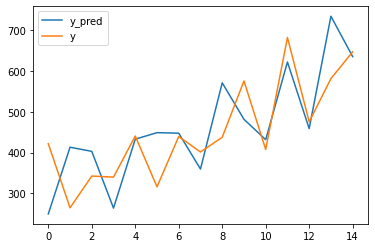

In [ ]:
y_pred = model.predict(X_test)

plt.plot(y_pred, label ='y_pred')
plt.plot(y_test, label ='y')
plt.legend()

In [ ]:
model.predict(X_new)

1/1 [==============================] - 0s 21ms/step


array([[562.2797]], dtype=float32)

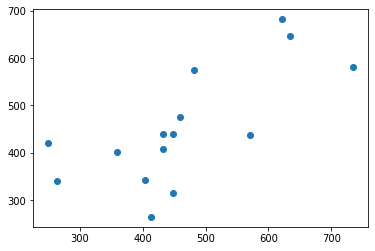

In [ ]:
plt.scatter(y_pred, y_test)

----

 > O modelo Prophet obteve o melhor resultado porque apontou o aumento do faturamento ao longo do tempo, enquanto o RNN apresentou overfiting.
  > O Deep RNN foi assertivo apenas nos meses finais.